In [6]:
import requests
from IPython.core.display import display, HTML

In [7]:
page = requests.get('https://it.wikipedia.org/wiki/Successione_di_Fibonacci')

In [9]:
display(HTML(page.text))

## Iterative

In [51]:
def fibo1(size=10):
    series = [1, 1]
    for i in range(2, size):
        series.append(series[-2] + series[-1])
    return series

## Recursive

In [52]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(5000)

5000


In [53]:
def fibo2(size, series=[], verbose=False):
    if verbose:
        print(size, series)
    if size == 0:
        return series
    if len(series) < 2:
        return fibo2(size - 1, series + [1], verbose=verbose)
    return fibo2(size - 1, series + [series[-1] + series[-2]], verbose=verbose)

In [54]:
fibo2(10, verbose=False)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

## Compare

In [55]:
import time

In [56]:
start = time.time()
_ = fibo1(size=2000)
print("iterative solution: execution time {}s".format(time.time() - start))
start = time.time()
_ = fibo2(size=2000)
print("recursive solution: execution time {}s".format(time.time() - start))

iterative solution: execution time 0.0005669593811035156s
recursive solution: execution time 0.027183055877685547s


## Growth

In [57]:
i_time, r_time = [], []
for i in range(10, 1000, 10):
    start = time.time()
    _ = fibo1(size=i)
    i_time.append(time.time() - start)
    start = time.time()
    _ = fibo2(size=i)
    r_time.append(time.time() - start)

In [58]:
import matplotlib.pyplot as plt

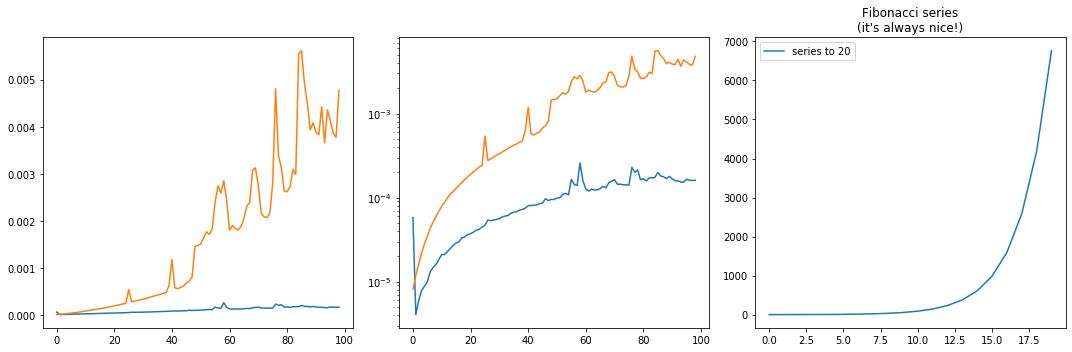

In [67]:
fig, ax = plt.subplots(figsize=(15,5), ncols=3)
ax[0].plot(i_time, label='iterative')
ax[0].plot(r_time, label='recursive')
ax[1].plot(i_time, label='iterative')
ax[1].plot(r_time, label='recursive')
ax[1].set_yscale('log')
ax[2].plot(fibo1(20), label='series to 20')
ax[2].set_title("Fibonacci series\n(it's always nice!)")
plt.legend()
plt.tight_layout()
plt.show()